Message Classification Based on the sent text(Spam/Ham)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('data/spam.csv', encoding = 'latin - 1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)


In [4]:
sms = sms.rename(columns = {'v1' : 'Label', 'v2' : 'Message'})
sms.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.tail()

,Label,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
sms.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
sms.index

RangeIndex(start=0, stop=5572, step=1)

In [9]:
sms.columns

Index(['Label', 'Message'], dtype='object')

In [10]:
sms.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
sms.shape

(5572, 2)

In [12]:
sms['Length'] = sms['Message'].apply(len)
sms.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000289C901C6D8>,
      dtype=object)

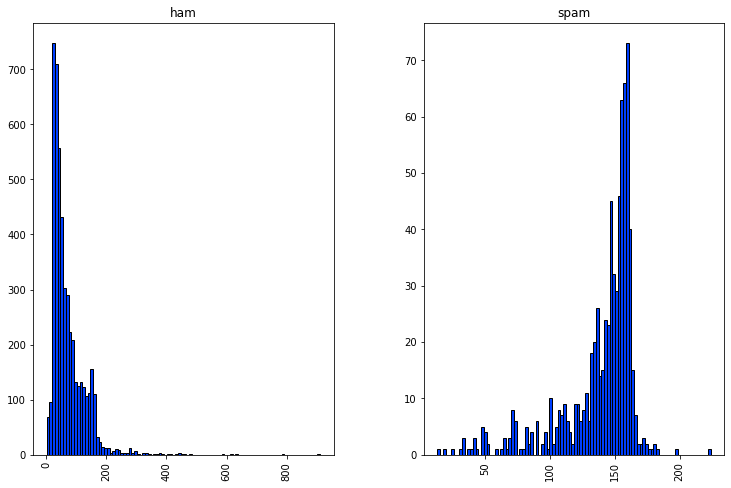

In [13]:
plt.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms.hist(column = 'Length', by = 'Label', bins = 100, figsize = (12, 8))

In [14]:
text_feat = sms['Message'].copy()
text_feat.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [15]:
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [16]:
text_feat = text_feat.apply(text_process)
text_feat.head()

0    Go jurong point crazy Available bugis n great ...
1                              Ok lar Joking wif u oni
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3                  U dun say early hor U c already say
4          Nah dont think goes usf lives around though
Name: Message, dtype: object

In [17]:
vectorized = TfidfVectorizer('Message')
vectorized

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='Message', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [18]:
features = vectorized.fit_transform(text_feat)
features

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [19]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['Label'], test_size = 0.3, random_state = 111)

In [20]:
features_train.shape

(3900, 9376)

In [21]:
features_test.shape

(1672, 9376)

In [22]:
labels_train.shape

(3900,)

In [23]:
labels_test.shape

(1672,)

In [24]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf', gamma = 'auto')
clf.fit(features_train, labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
labels_test[0:15]

2291     ham
3384     ham
1192     ham
1134     ham
1310     ham
2503     ham
2862     ham
5203     ham
5561     ham
4766    spam
1890     ham
5038     ham
1767     ham
3944     ham
436      ham
Name: Label, dtype: object

In [32]:
yhat = clf.predict(features)
yhat[0:15]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

In [33]:
clf.classes_

array(['ham', 'spam'], dtype=object)

In [34]:
clf.gamma

'auto'

In [36]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver = 'lbfgs', C = 0.01)
regr.fit(features_train, labels_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
labels_test[0:15]

2291     ham
3384     ham
1192     ham
1134     ham
1310     ham
2503     ham
2862     ham
5203     ham
5561     ham
4766    spam
1890     ham
5038     ham
1767     ham
3944     ham
436      ham
Name: Label, dtype: object

In [40]:
ypred = regr.predict(features_test)
ypred[0:15]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, metric='manhattan')
knn.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
labels_test[0:15]

2291     ham
3384     ham
1192     ham
1134     ham
1310     ham
2503     ham
2862     ham
5203     ham
5561     ham
4766    spam
1890     ham
5038     ham
1767     ham
3944     ham
436      ham
Name: Label, dtype: object

In [45]:
yhat_1 = knn.predict(features_test)
yhat_1[0:15]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

In [47]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(features_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
labels_test[0:10]

2291     ham
3384     ham
1192     ham
1134     ham
1310     ham
2503     ham
2862     ham
5203     ham
5561     ham
4766    spam
Name: Label, dtype: object

In [49]:
ypred_1 = dt.predict(features_test)
ypred_1[0:10]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam'], dtype=object)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
labels_test[0:10]

2291     ham
3384     ham
1192     ham
1134     ham
1310     ham
2503     ham
2862     ham
5203     ham
5561     ham
4766    spam
Name: Label, dtype: object

In [54]:
yhat_2 = rf.predict(features_test)
yhat_2[0:10]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype=object)

In [56]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
ber = BernoulliNB()
ber.fit(features_train, labels_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [58]:
labels_test[:10]

2291     ham
3384     ham
1192     ham
1134     ham
1310     ham
2503     ham
2862     ham
5203     ham
5561     ham
4766    spam
Name: Label, dtype: object

ypred_2 = ber.predict(features_test)
ypred_2[0:15]